tensorboard --logdir lightning/ --host localhost --port 8088

In [1]:
import pytorch_lightning as pl
import os
import matplotlib.pyplot as plt
latent_dims = 64




GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name      | Type       | Params
-----------------------------------------
0 | test_acc  | Accuracy   | 0     
1 | encoder   | Sequential | 3.2 M 
2 | classifer | Sequential | 6.6 K 
-----------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.645    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [00:34<00:00,  2.88it/s]
0.0004889663842714639


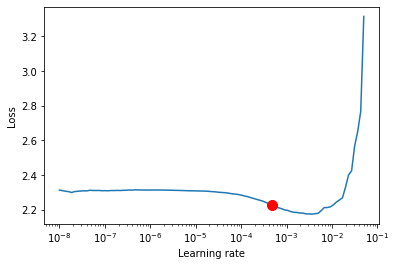

In [2]:
from lightning_models.Regular_EN import Regular_En
model_RG_EN = Regular_En(latent_dims)

trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RG_EN,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name      | Type       | Params
-----------------------------------------
0 | test_acc  | Accuracy   | 0     
1 | encoder   | Sequential | 3.2 M 
2 | decoder   | Sequential | 4.8 M 
3 | classifer | Sequential | 6.6 K 
-----------------------------------------
7.9 M     Trainable params
0         Non-trainable params
7.9 M     Total params
31.656    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [02:50<00:00,  1.88s/it]Restored states from the checkpoint file at c:\Users\WangS1\mbrdl\lr_find_temp_model.ckpt
0.0010573712634405642
Finding best initial lr: 100%|██████████| 100/100 [02:51<00:00,  1.71s/it]


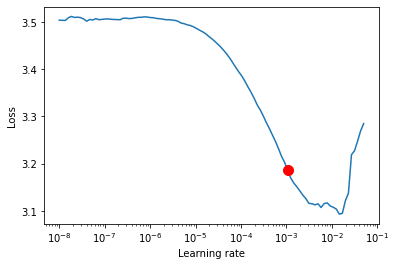

In [2]:
from lightning_models.Regular_AE import Regular_AE
model_RG_AE = Regular_AE(latent_dims,weight=1)

if os.path.exists("loss1.txt"):
    os.remove("loss1.txt") 
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RG_AE,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

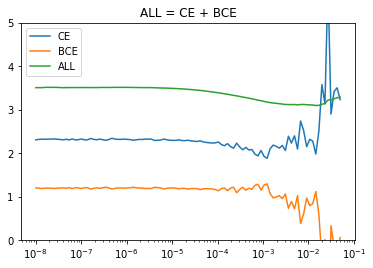

In [4]:
loss1 = open('loss1.txt','r')
loss_CE = []
loss_BCE = []
loss_total = []
list_loss = loss1.readlines()
for i in range(len(list_loss)):
    loss_CE.append(float(list_loss[i][:10]))
    loss_BCE.append(lr_finder.results['loss'][i]-float(list_loss[i][:10]))
    loss_total.append(lr_finder.results['loss'][i])

plt.plot(lr_finder.results['lr'],loss_CE)
plt.plot(lr_finder.results['lr'],loss_BCE)
plt.plot(lr_finder.results['lr'],loss_total)
plt.xscale('log')
plt.legend(('CE','BCE','ALL'))
plt.title('ALL = CE + BCE')
plt.ylim((0,5))
plt.show()


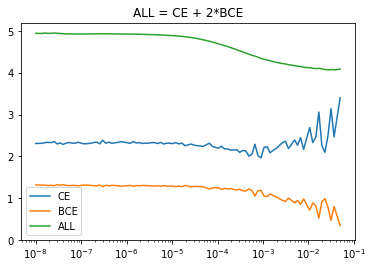

In [9]:
loss1 = open('loss1.txt','r')
loss_CE = []
loss_BCE = []
loss_total = []
list_loss = loss1.readlines()
for i in range(len(list_loss)):
    loss_CE.append(float(list_loss[i][:10]))
    loss_BCE.append(lr_finder.results['loss'][i]/2.0-float(list_loss[i][:10])/2.0)
    loss_total.append(lr_finder.results['loss'][i])

plt.plot(lr_finder.results['lr'],loss_CE)
plt.plot(lr_finder.results['lr'],loss_BCE)
plt.plot(lr_finder.results['lr'],loss_total)
plt.xscale('log')
plt.legend(('CE','BCE','ALL'))
plt.title('ALL = CE + 2*BCE')
plt.ylim((0,5.2))
plt.show()

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name     | Type        | Params
-----------------------------------------
0 | test_acc | Accuracy    | 0     
1 | conv1    | Conv2d      | 1.7 K 
2 | bn1      | BatchNorm2d | 128   
3 | layer1   | Sequential  | 147 K 
4 | layer2   | Sequential  | 525 K 
5 | layer3   | Sequential  | 2.1 M 
6 | layer4   | Sequential  | 8.4 M 
7 | linear   | Linear      | 5.1 K 
-----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [04:12<00:00,  2.52s/it]
0.00012022644346174131


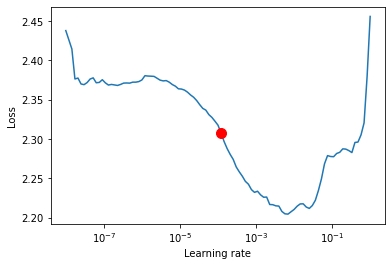

In [3]:
from lightning_models.ResNet_EN import ResNet, BasicBlock
model_RN_EN = ResNet(BasicBlock, [2, 2, 2, 2])

trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RN_EN)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

   | Name      | Type        | Params
-------------------------------------------
0  | test_acc  | Accuracy    | 0     
1  | conv1     | Conv2d      | 1.7 K 
2  | bn1       | BatchNorm2d | 128   
3  | layer1    | Sequential  | 147 K 
4  | layer2    | Sequential  | 525 K 
5  | layer3    | Sequential  | 2.1 M 
6  | layer4    | Sequential  | 8.4 M 
7  | linear    | Linear      | 131 K 
8  | linear2   | Linear      | 2.1 M 
9  | layer6    | Sequential  | 3.5 M 
10 | layer7    | Sequential  | 870 K 
11 | layer8    | Sequential  | 217 K 
12 | conv2     | Sequential  | 1.7 K 
13 | classifer | Sequential  | 18.9 K
-------------------------------------------
18.0 M    Trainable params
0         Non-trainable params
18.0 M    Total params
71.965    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [09:07<00:00,  5.43s/it]Restored states from the checkpoint file at c:\Users\WangS1\mbrd

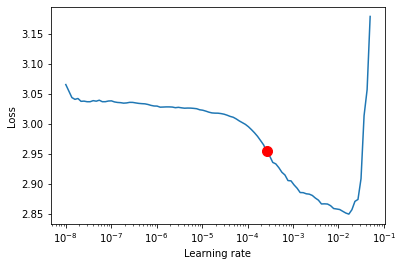

In [3]:
from lightning_models.ResNet_AE import ResNet_AE, Upconvblock, BasicBlock
model_RN_AE = ResNet_AE(BasicBlock, Upconvblock, [2, 2, 2, 2])


if os.path.exists("loss1.txt"):
    os.remove("loss1.txt") 
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RN_AE,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

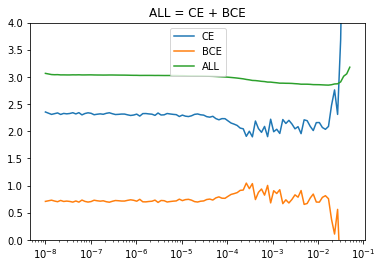

In [6]:
loss1 = open('loss1.txt','r')
loss_CE = []
loss_BCE = []
loss_total = []
list_loss = loss1.readlines()
for i in range(len(list_loss)):
    loss_CE.append(float(list_loss[i][:10]))
    loss_BCE.append(lr_finder.results['loss'][i]-float(list_loss[i][:10]))
    loss_total.append(lr_finder.results['loss'][i])

plt.plot(lr_finder.results['lr'],loss_CE)
plt.plot(lr_finder.results['lr'],loss_BCE)
plt.plot(lr_finder.results['lr'],loss_total)
plt.xscale('log')
plt.legend(('CE','BCE','ALL'))
plt.title('ALL = CE + BCE')
plt.ylim((0,4))
plt.show()


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

   | Name     | Type        | Params
------------------------------------------
0  | test_acc | Accuracy    | 0     
1  | conv1    | Conv2d      | 1.7 K 
2  | dense1   | Sequential  | 335 K 
3  | trans1   | Transition  | 33.3 K
4  | dense2   | Sequential  | 919 K 
5  | trans2   | Transition  | 132 K 
6  | dense3   | Sequential  | 2.8 M 
7  | trans3   | Transition  | 526 K 
8  | dense4   | Sequential  | 2.2 M 
9  | bn       | BatchNorm2d | 2.0 K 
10 | linear   | Linear      | 10.2 K
------------------------------------------
7.0 M     Trainable params
0         Non-trainable params
7.0 M     Total params
27.825    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [18:20<00:00, 10.52s/it]Restored states from the checkpoint file at c:\Users\WangS1\mbrdl\lr_find_temp_model.ckpt
0.0007766906967253467
Finding best initial lr: 100%|██████████| 100/100 [18:21<00:00, 11.02s/it]


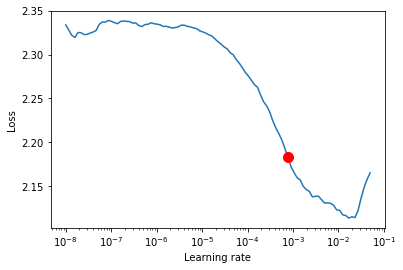

In [2]:
from lightning_models.DenseNet_EN import DenseNet_EN, Bottleneck 
model_DN_EN = DenseNet_EN(Bottleneck, [6,12,24,16], growth_rate=32)

trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_DN_EN,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

   | Name       | Type            | Params
------------------------------------------------
0  | test_acc   | Accuracy        | 0     
1  | encoder1   | Sequential      | 10.2 K
2  | pool1      | MaxPool2d       | 0     
3  | encoder2   | Sequential      | 55.6 K
4  | pool2      | MaxPool2d       | 0     
5  | encoder3   | Sequential      | 221 K 
6  | pool3      | MaxPool2d       | 0     
7  | encoder4   | Sequential      | 885 K 
8  | pool4      | MaxPool2d       | 0     
9  | bottleneck | Sequential      | 3.5 M 
10 | upconv4    | ConvTranspose2d | 524 K 
11 | decoder4   | Sequential      | 1.8 M 
12 | upconv3    | ConvTranspose2d | 131 K 
13 | decoder3   | Sequential      | 442 K 
14 | upconv2    | ConvTranspose2d | 32.8 K
15 | decoder2   | Sequential      | 110 K 
16 | upconv1    | ConvTranspose2d | 8.2 K 
17 | decoder1   | Sequential      | 27.8 K
18 | conv       | Conv2d          | 99    
19 | flatenc    |

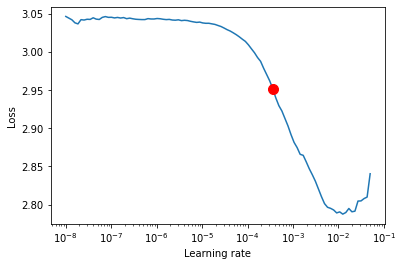

In [2]:
from lightning_models.UNet_AE import UNet
model_UN_EN = UNet()


if os.path.exists("loss1.txt"):
    os.remove("loss1.txt") 
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_UN_EN,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())


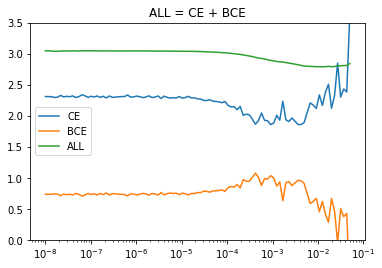

In [4]:
loss1 = open('loss1.txt','r')
loss_CE = []
loss_BCE = []
loss_total = []
list_loss = loss1.readlines()
for i in range(len(list_loss)):
    loss_CE.append(float(list_loss[i][:10]))
    loss_BCE.append(lr_finder.results['loss'][i]-float(list_loss[i][:10]))
    loss_total.append(lr_finder.results['loss'][i])

plt.plot(lr_finder.results['lr'],loss_CE)
plt.plot(lr_finder.results['lr'],loss_BCE)
plt.plot(lr_finder.results['lr'],loss_total)
plt.xscale('log')
plt.legend(('CE','BCE','ALL'))
plt.title('ALL = CE + BCE')
plt.ylim((0,3.5))
plt.show()

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

   | Name      | Type        | Params
-------------------------------------------
0  | test_acc  | Accuracy    | 0     
1  | conv1     | Conv2d      | 1.7 K 
2  | bn1       | BatchNorm2d | 128   
3  | layer1    | Sequential  | 147 K 
4  | layer2    | Sequential  | 525 K 
5  | layer3    | Sequential  | 2.1 M 
6  | layer4    | Sequential  | 8.4 M 
7  | linear    | Linear      | 32.8 K
8  | linear2   | Linear      | 532 K 
9  | layer5    | Sequential  | 2.3 M 
10 | layer6    | Sequential  | 576 K 
11 | layer7    | Sequential  | 144 K 
12 | layer8    | Sequential  | 17.2 K
13 | conv2     | Sequential  | 1.7 K 
14 | classifer | Sequential  | 6.6 K 
-------------------------------------------
14.8 M    Trainable params
0         Non-trainable params
14.8 M    Total params
59.116    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [08:25<00:00,  5.04s/it]Restored states from the c

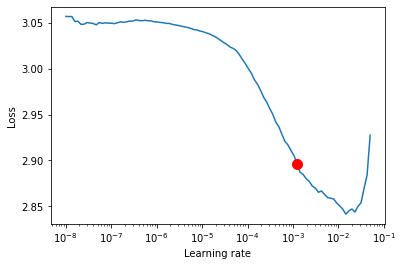

In [2]:
from lightning_models.ResNet_AE_sym import ResNet_AE_sym, BasicBlock, Upconvblock
model_RN_AE_SYM = ResNet_AE_sym(BasicBlock, Upconvblock, [2, 2, 2, 2],latent_dims=latent_dims)

if os.path.exists("loss1.txt"):
    os.remove("loss1.txt") 
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RN_AE_SYM,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

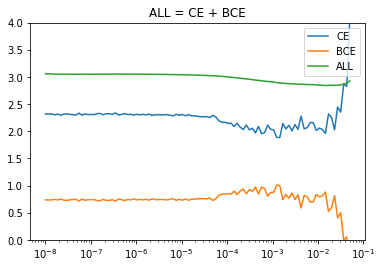

In [4]:
loss1 = open('loss1.txt','r')
loss_CE = []
loss_BCE = []
loss_total = []
list_loss = loss1.readlines()
for i in range(len(list_loss)):
    loss_CE.append(float(list_loss[i][:10]))
    loss_BCE.append(lr_finder.results['loss'][i]-float(list_loss[i][:10]))
    loss_total.append(lr_finder.results['loss'][i])

plt.plot(lr_finder.results['lr'],loss_CE)
plt.plot(lr_finder.results['lr'],loss_BCE)
plt.plot(lr_finder.results['lr'],loss_total)
plt.xscale('log')
plt.legend(('CE','BCE','ALL'))
plt.title('ALL = CE + BCE')
plt.ylim((0,4))
plt.show()

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

   | Name      | Type            | Params
-----------------------------------------------
0  | test_acc  | Accuracy        | 0     
1  | conv1     | Conv2d          | 1.7 K 
2  | bn1       | BatchNorm2d     | 128   
3  | layer1    | Sequential      | 147 K 
4  | layer2    | Sequential      | 525 K 
5  | layer3    | Sequential      | 2.1 M 
6  | layer4    | Sequential      | 8.4 M 
7  | linear    | Linear          | 32.8 K
8  | linear2   | Linear          | 532 K 
9  | upconv4   | ConvTranspose2d | 524 K 
10 | decoder4  | Sequential      | 1.8 M 
11 | upconv3   | ConvTranspose2d | 131 K 
12 | decoder3  | Sequential      | 442 K 
13 | upconv2   | ConvTranspose2d | 32.8 K
14 | decoder2  | Sequential      | 110 K 
15 | layer8    | Sequential      | 147 K 
16 | conv2     | Sequential      | 195   
17 | classifer | Sequential      | 6.6 K 
-----------------------------------------------
14.9 M    Trainable params
0    

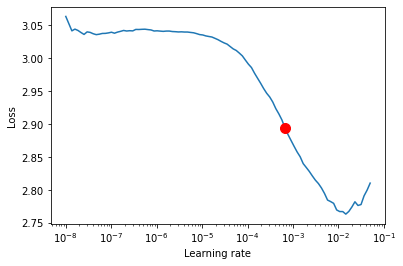

In [2]:
from lightning_models.ResNet_AE_skip import ResNet_AE_skip, BasicBlock
model_RN_AE_SKP = ResNet_AE_skip(BasicBlock, [2, 2, 2, 2],latent_dims=latent_dims,weight=1)


if os.path.exists("loss1.txt"):
    os.remove("loss1.txt") 
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RN_AE_SKP,max_lr=0.05)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

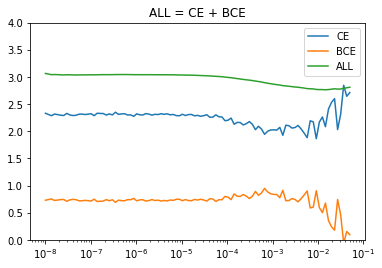

In [5]:
loss1 = open('loss1.txt','r')
loss_CE = []
loss_BCE = []
loss_total = []
list_loss = loss1.readlines()
for i in range(len(list_loss)):
    loss_CE.append(float(list_loss[i][:10]))
    loss_BCE.append(lr_finder.results['loss'][i]-float(list_loss[i][:10]))
    loss_total.append(lr_finder.results['loss'][i])

plt.plot(lr_finder.results['lr'],loss_CE)
plt.plot(lr_finder.results['lr'],loss_BCE)
plt.plot(lr_finder.results['lr'],loss_total)
plt.xscale('log')
plt.legend(('CE','BCE','ALL'))
plt.title('ALL = CE + BCE')
plt.ylim((0,4))
plt.show()